<a href="https://colab.research.google.com/github/split56/MLn/blob/main/cancelStatus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
df = df.drop(columns = ['Booking_ID'],axis = 1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [8]:
#under smapling

bk_canceled = df[df['booking_status']=='Canceled']
bk_Ncanceled = df[df['booking_status']=='Not_Canceled']


In [9]:
bk_Ncanceled_sample = bk_Ncanceled.sample(11885)

In [12]:
new_df = pd.concat([bk_canceled,bk_Ncanceled_sample],axis = 0)
new_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
12,2,0,2,1,Not Selected,0,Room_Type 1,30,2018,11,26,Online,0,0,0,88.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14217,2,0,0,1,Not Selected,0,Room_Type 1,86,2018,4,26,Online,0,0,0,85.50,1,Not_Canceled
15046,1,0,0,1,Meal Plan 1,0,Room_Type 1,5,2017,9,22,Corporate,0,0,0,65.00,0,Not_Canceled
6401,2,0,2,1,Meal Plan 1,0,Room_Type 1,41,2018,3,13,Corporate,0,0,0,85.67,0,Not_Canceled
5877,2,0,2,1,Meal Plan 1,0,Room_Type 1,11,2018,10,8,Online,0,0,0,122.13,0,Not_Canceled


In [14]:
print(new_df['type_of_meal_plan'].nunique(),new_df['room_type_reserved'].nunique(),new_df['market_segment_type'].nunique())

4 7 5


In [15]:
new_df = pd.get_dummies(new_df, columns=['type_of_meal_plan','room_type_reserved','market_segment_type'], drop_first=True)
new_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True
5,2,0,0,2,0,346,2018,9,13,0,...,False,False,False,False,False,False,False,False,False,True
12,2,0,2,1,0,30,2018,11,26,0,...,False,False,False,False,False,False,False,False,False,True


In [16]:
new_df['booking_status'] = [0 if c == 'Not_Canceled' else 1 for c in new_df['booking_status']]

In [17]:
X = new_df.drop(columns=['booking_status'],axis = 1)
y = new_df['booking_status']

print(X.shape,y.shape)

(23770, 27) (23770,)


In [18]:
new_df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [28]:
cat_columns = ['repeated_guest','required_car_parking_space','type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online']

num_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights',  'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

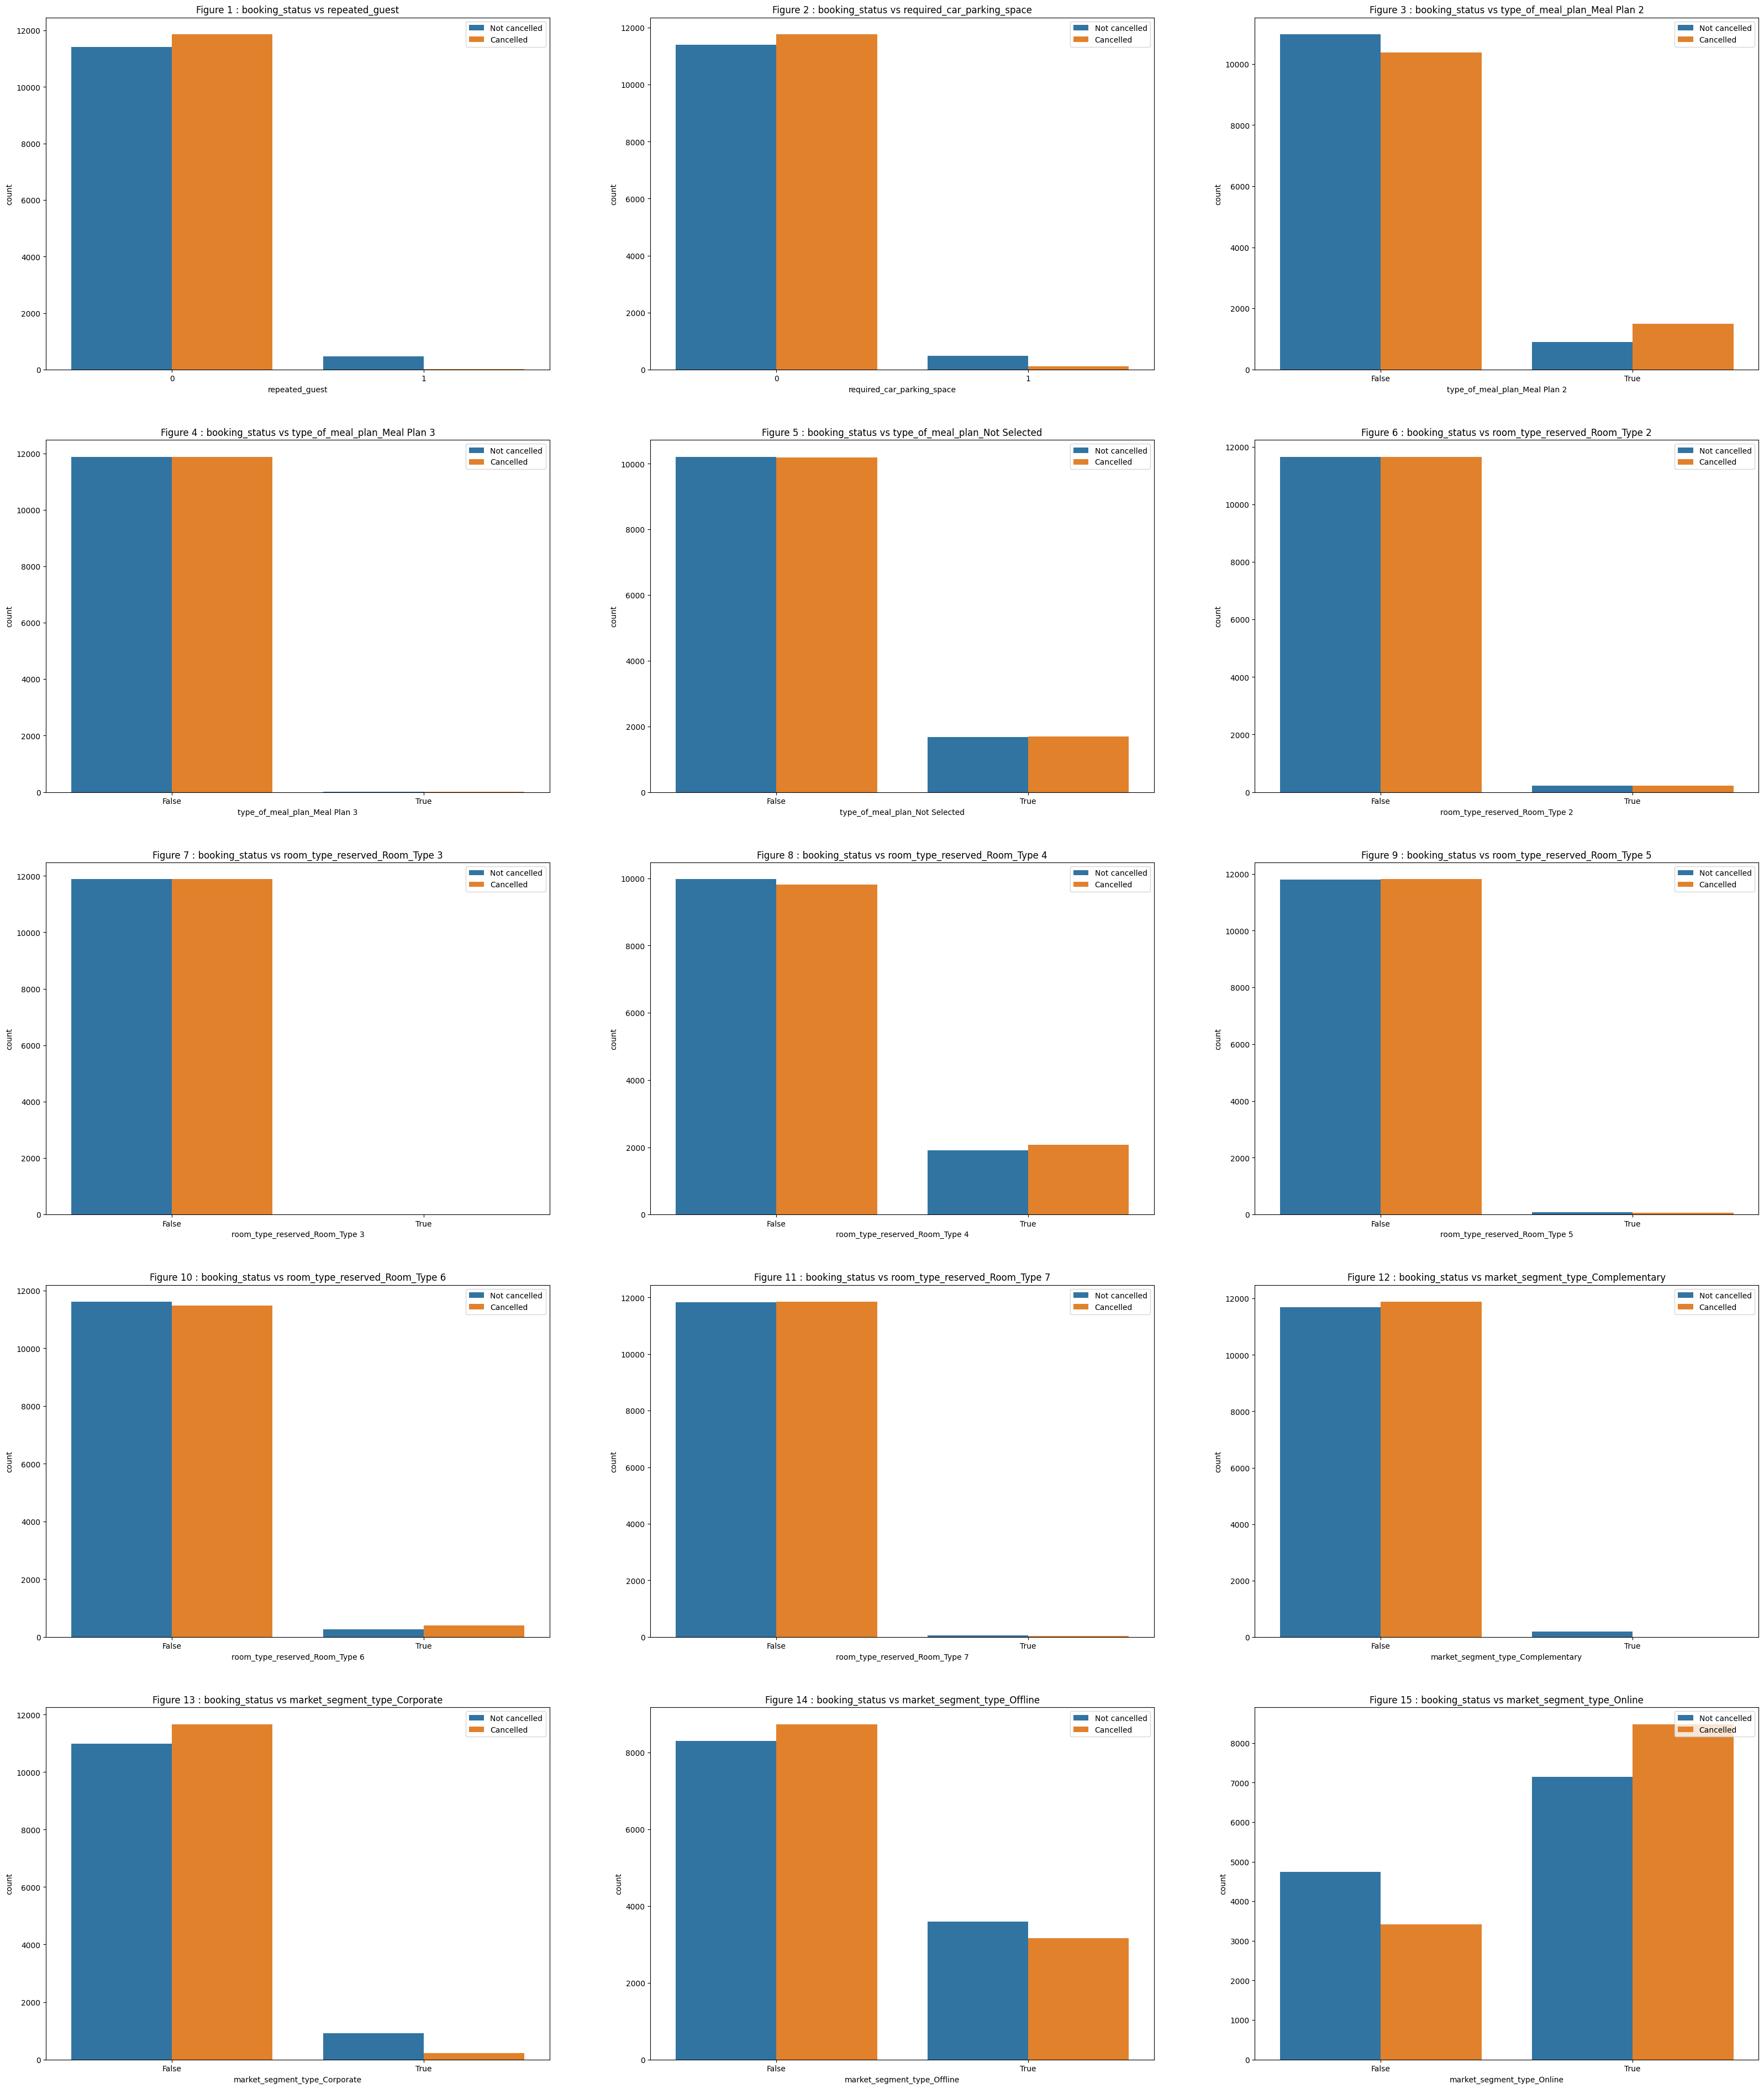

In [29]:
n_rows = 5
n_cols = 3

fig,ax = plt.subplots(n_rows,n_cols,figsize = (n_rows*8,n_cols*16))

for r in range(0,n_rows):
  for c in range(0,n_cols):
    i = r * n_cols + c
    if i < len(cat_columns):
      ax_i = ax[r,c]
      sns.countplot(data = new_df, x = cat_columns[i],hue = 'booking_status', ax = ax_i)
      ax_i.set_title(f'Figure {i+1} : booking_status vs {cat_columns[i]}')
      ax_i.legend(title='',loc='upper right', labels=['Not cancelled','Cancelled'])

plt.show()

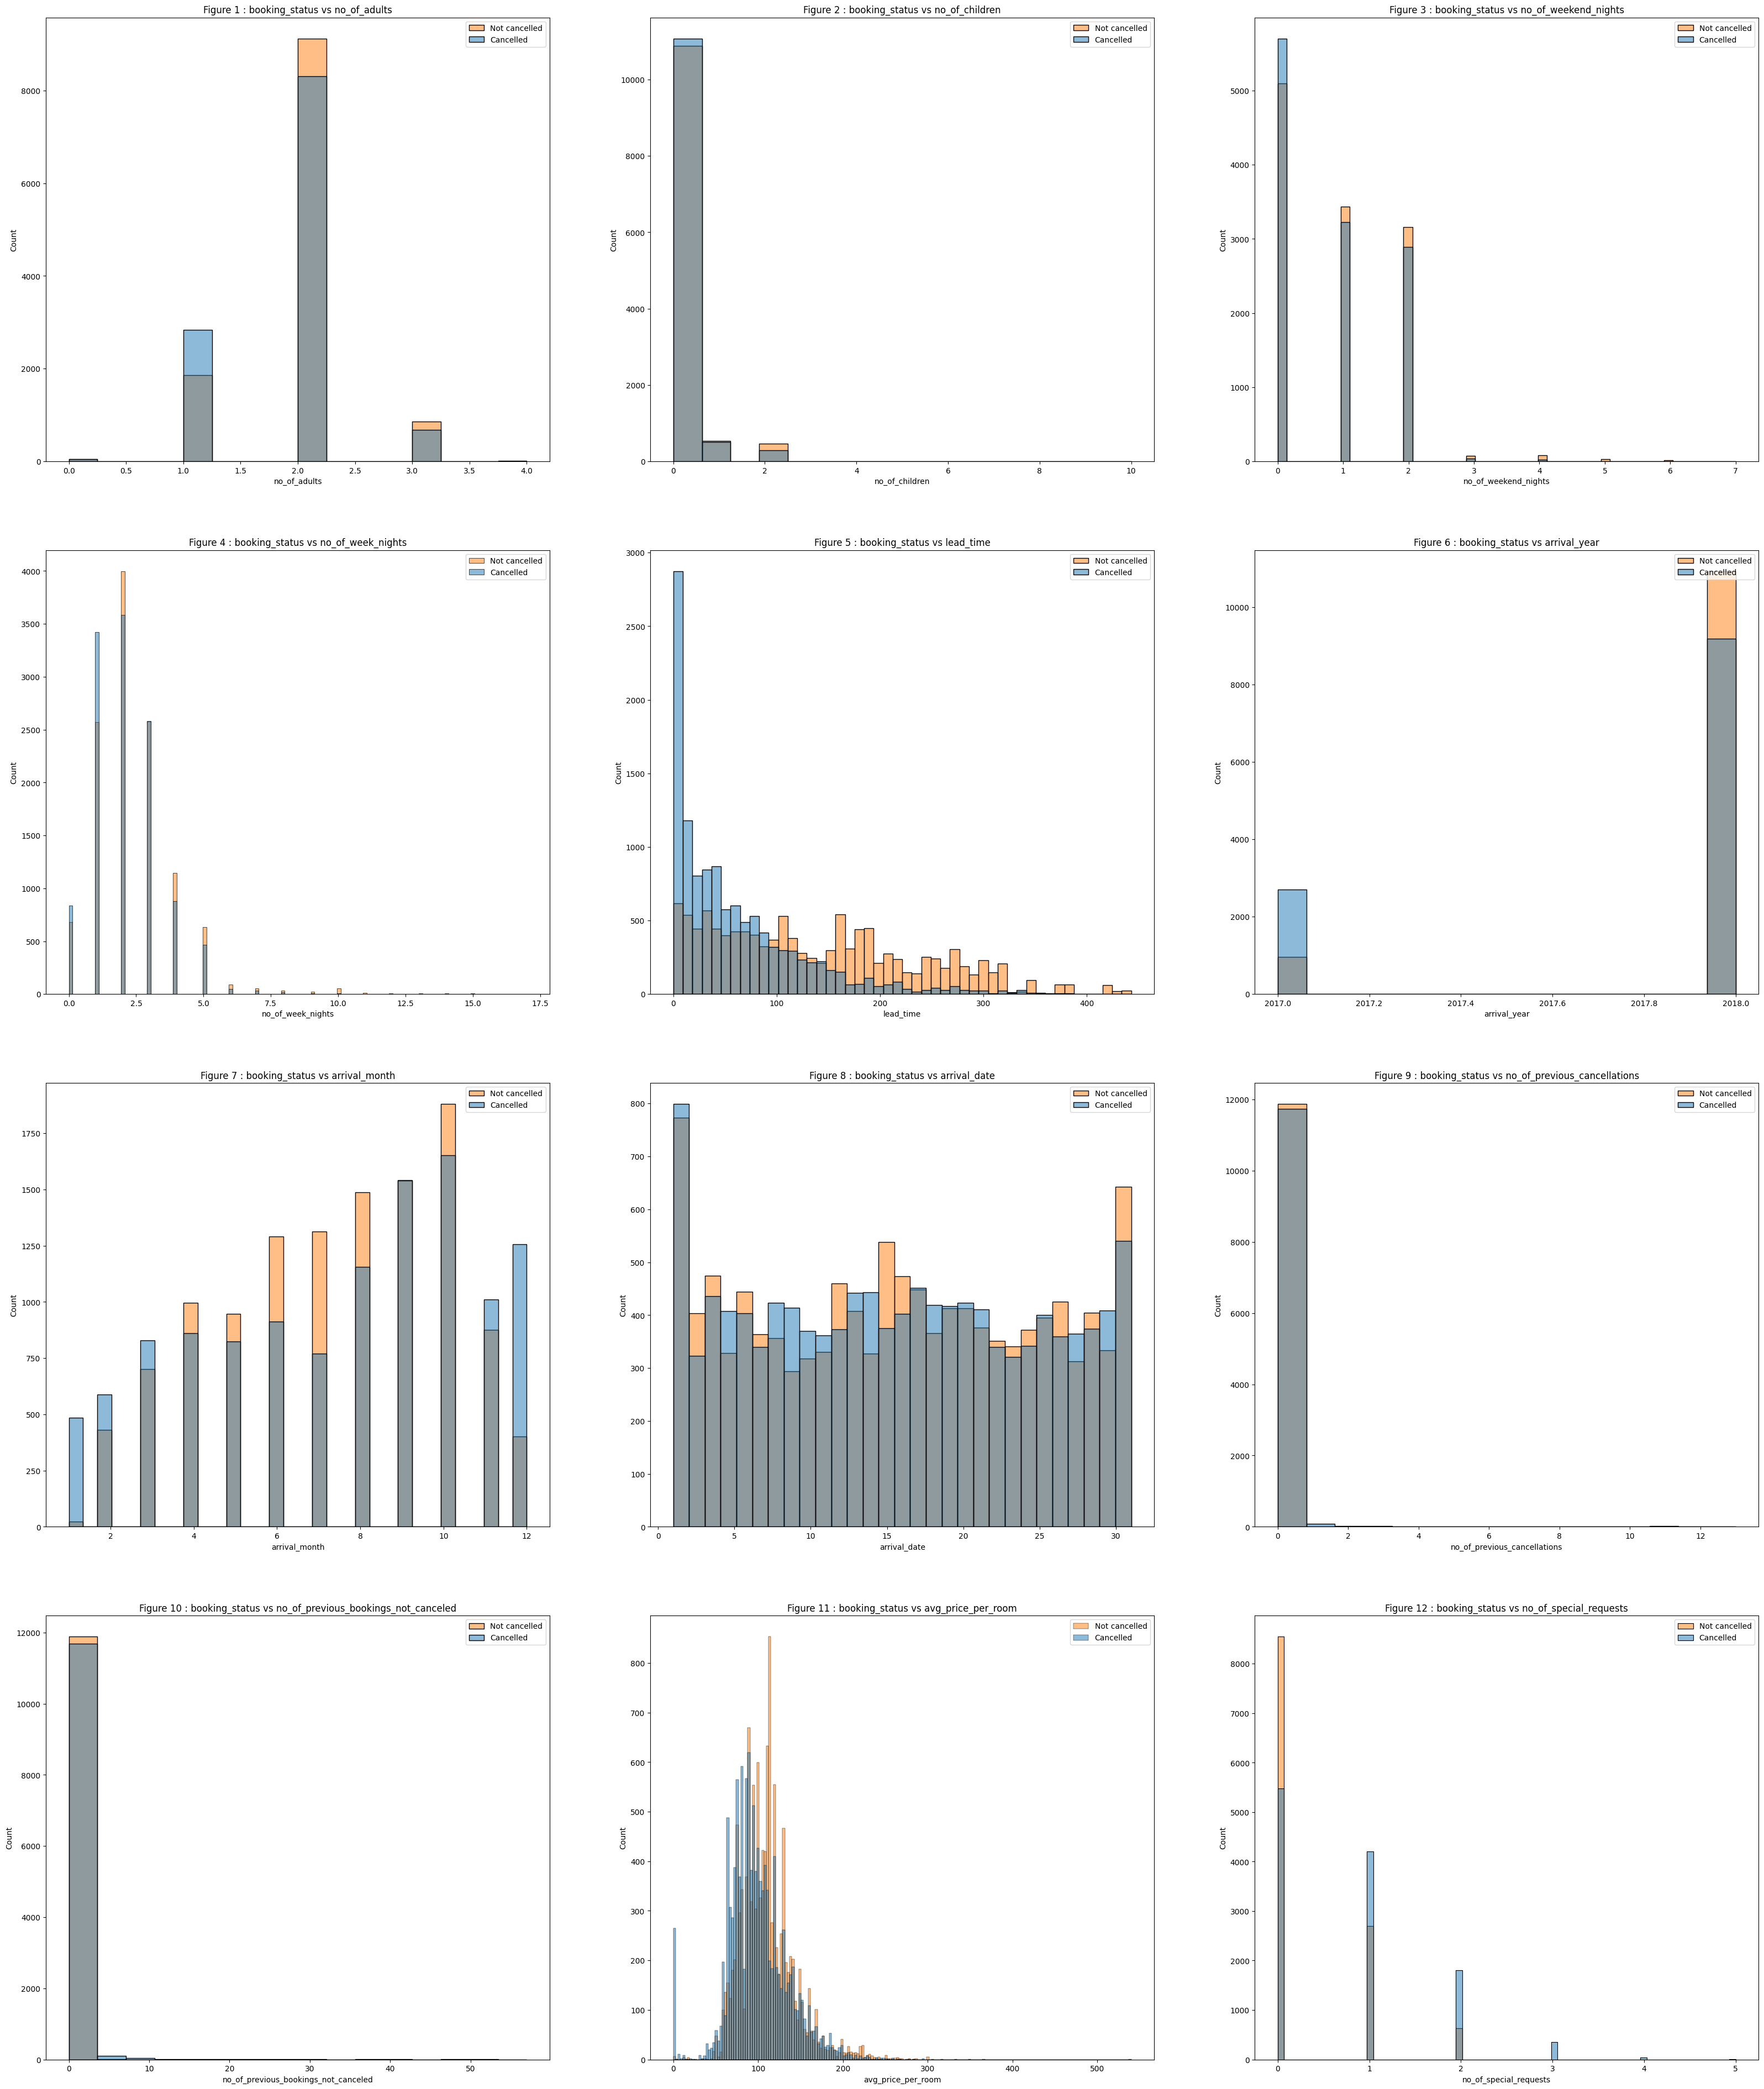

In [32]:
n_rows = 4
n_cols = 3

fig,ax = plt.subplots(n_rows,n_cols,figsize = (n_rows*10,n_cols*16))

for r in range(0,n_rows):
  for c in range(0,n_cols):
    i = r * n_cols + c
    if i < len(num_columns):
      ax_i = ax[r,c]
      sns.histplot(data = new_df, x = num_columns[i],hue = 'booking_status', ax = ax_i)
      ax_i.set_title(f'Figure {i+1} : booking_status vs {num_columns[i]}')
      ax_i.legend(title='',loc='upper right', labels=['Not cancelled','Cancelled'])

plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [34]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 42)

In [35]:
print(X_train.shape,X_test.shape,X.shape)
print(y_train.shape,y_test.shape,y.shape)

(19016, 27) (4754, 27) (23770, 27)
(19016,) (4754,) (23770,)


In [36]:
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()


In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
models = [log_reg, decision_tree, random_forest]
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}, Standard Deviation = {scores.std()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression: Mean Accuracy = 0.7761883155503169, Standard Deviation = 0.00582752140409069
DecisionTreeClassifier: Mean Accuracy = 0.8409758967752781, Standard Deviation = 0.0035465692545838755
RandomForestClassifier: Mean Accuracy = 0.8838344734758905, Standard Deviation = 0.00261345481467238


In [39]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_pred = random_forest.predict(X_test)

In [42]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.8767353807320152
